Title

Introduction

Preliminary exploratory data analysis

In [60]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(ggplot2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [80]:
cleveland_data <- read_csv("processed.cleveland.data", col_names = FALSE) %>%
    rename("age" = X1,
          "sex" = X2,
          "cp" = X3, 
          "trestbps" = X4,
          "chol" = X5, 
          "fbs" = X6,
          "restecg" = X7, 
          "thalach" = X8,
          "exang" = X9,
          "oldpeak" = X10,
          "slope" = X11,
          "ca" = X12,
          "thal" = X13,
          "num" = X14) %>%
    mutate(ca = as.double(ca), thal = as.double(thal), sex = as_factor(sex), num = as_factor(num))

heart_disease_split <- initial_split(cleveland_data, prop = 0.75, strata = num)%>%
na.omit()
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)
heart_disease_train

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)

Warning message:
“Problem with `mutate()` input `ca`.
ℹ NAs introduced by coercion
ℹ Input `ca` is `as.double(ca)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thal`.
ℹ NAs introduced by coercion
ℹ Input `thal` is `as.double(thal)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0


Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 4 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 4 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 2 rows containing missing values”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 4 rows containing miss

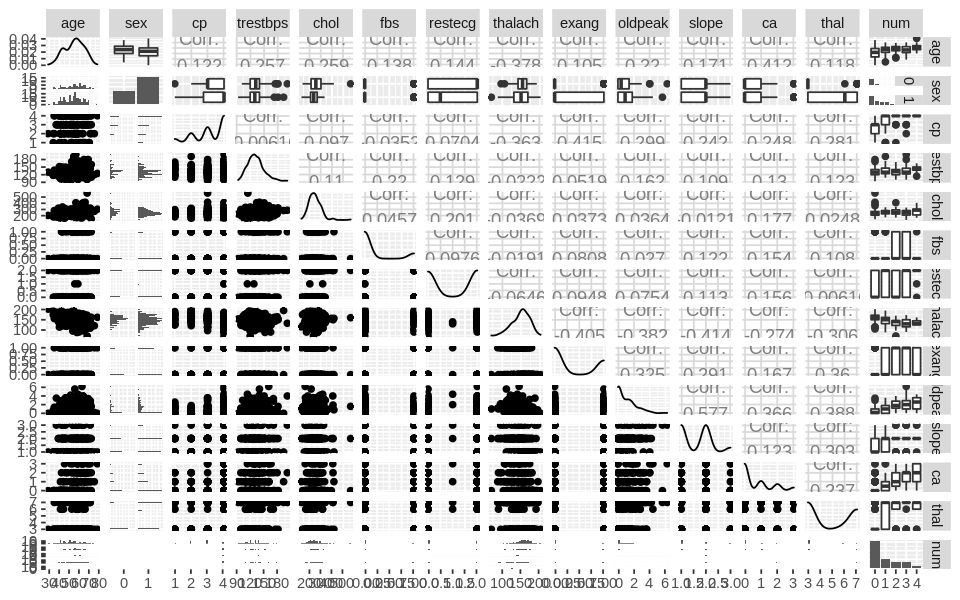

In [81]:
options(repr.plot.width = 8, repr.plot.height = 5)
a<-ggplot(heart_disease_train, aes(x=chol,y=age,color=factor(num))) +
     geom_point() +
     labs(x="trestbps", y="thalach",color="Heart Disease Level") +
     theme(text=element_text(size=18))
# a
b<-ggpairs(heart_disease_train)
b


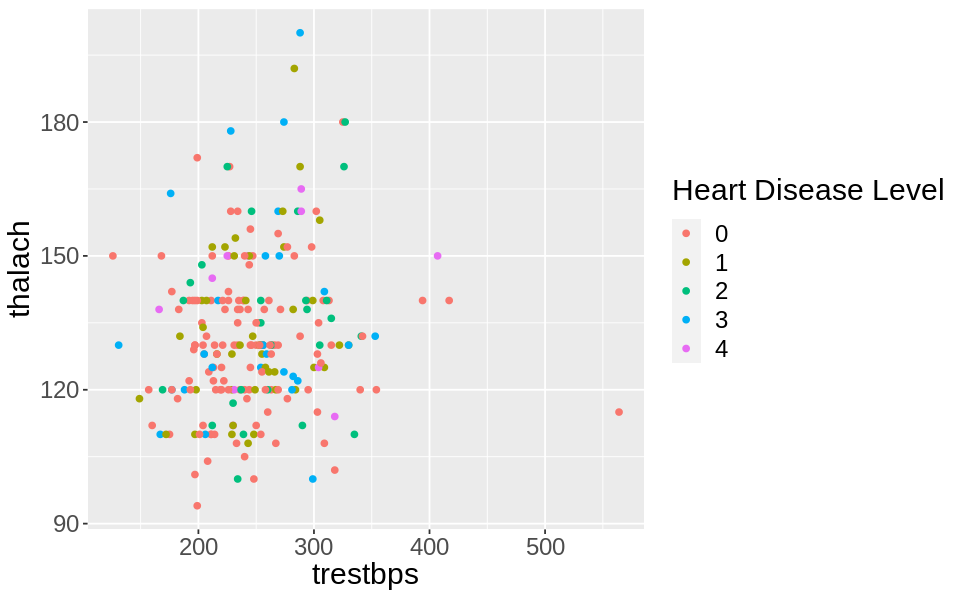

In [69]:
a<-ggplot(heart_disease_train, aes(x=chol,y=trestbps,color=factor(num))) +
     geom_point() +
     labs(x="trestbps", y="thalach",color="Heart Disease Level") +
     theme(text=element_text(size=18))
a

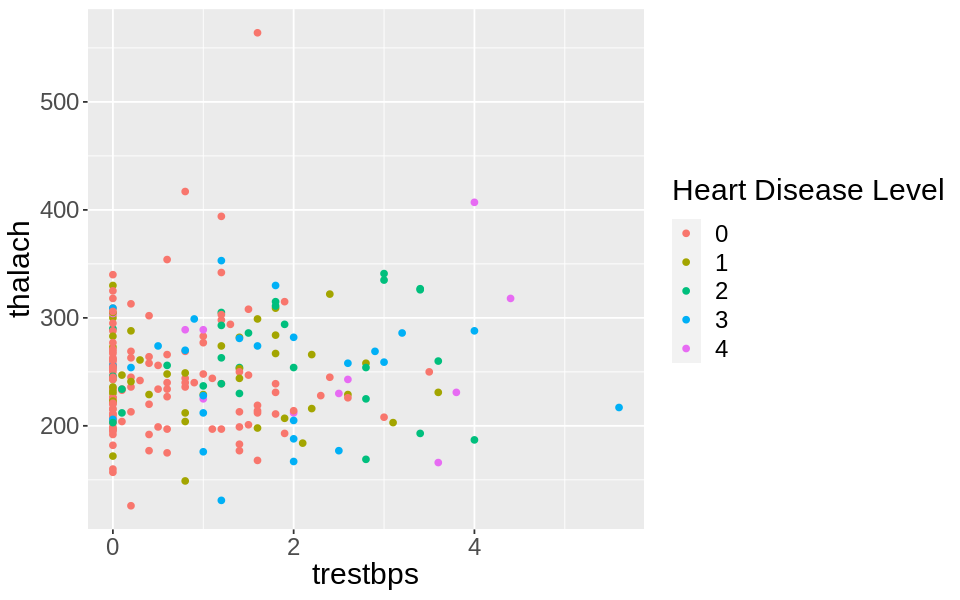

In [73]:
a<-ggplot(heart_disease_train, aes(x=oldpeak,y=chol,color=factor(num))) +
     geom_point() +
     labs(x="trestbps", y="thalach",color="Heart Disease Level") +
     theme(text=element_text(size=18))
a

In [90]:
a<-ggplot(heart_disease_train, aes(x=thalach, fill=num) +
          geom_histogram(position="dodge")+ 
  

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: a<-ggplot(heart_disease_train, aes(x=thalach, fill=num) + geom_histogram(position="dodge")+ labs(x="Life expectancy",fill="Heart Disease Level")
   ^


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 15 rows containing missing values (geom_bar).”


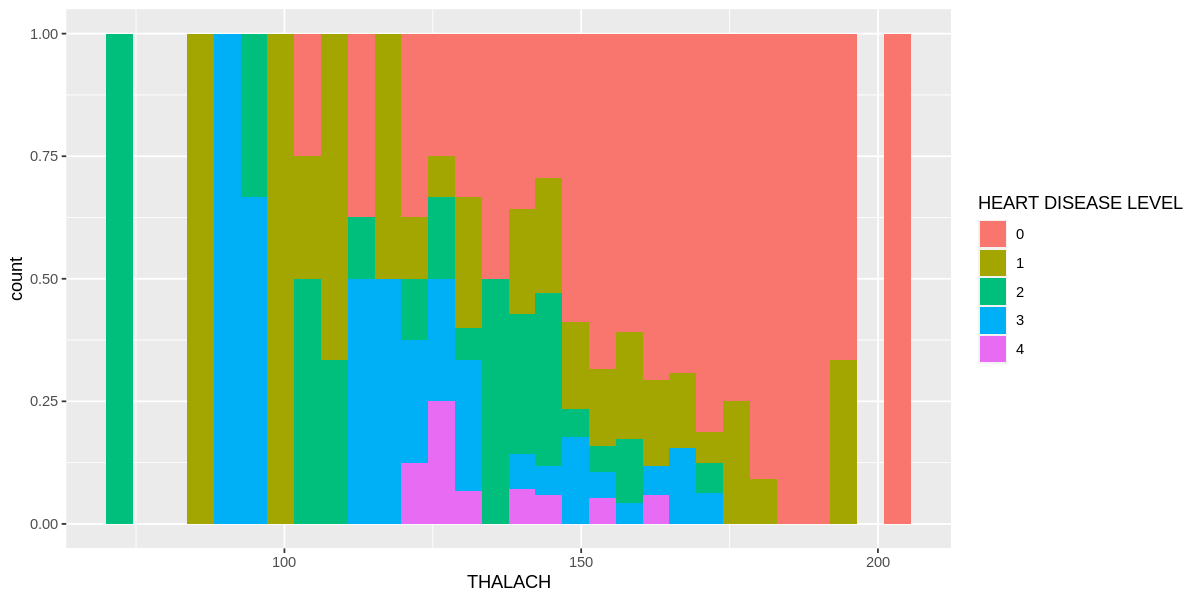

In [114]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=thalach,fill=num))+
    geom_histogram(position= "fill")+
    labs(x="THALACH",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 20 rows containing missing values (geom_bar).”


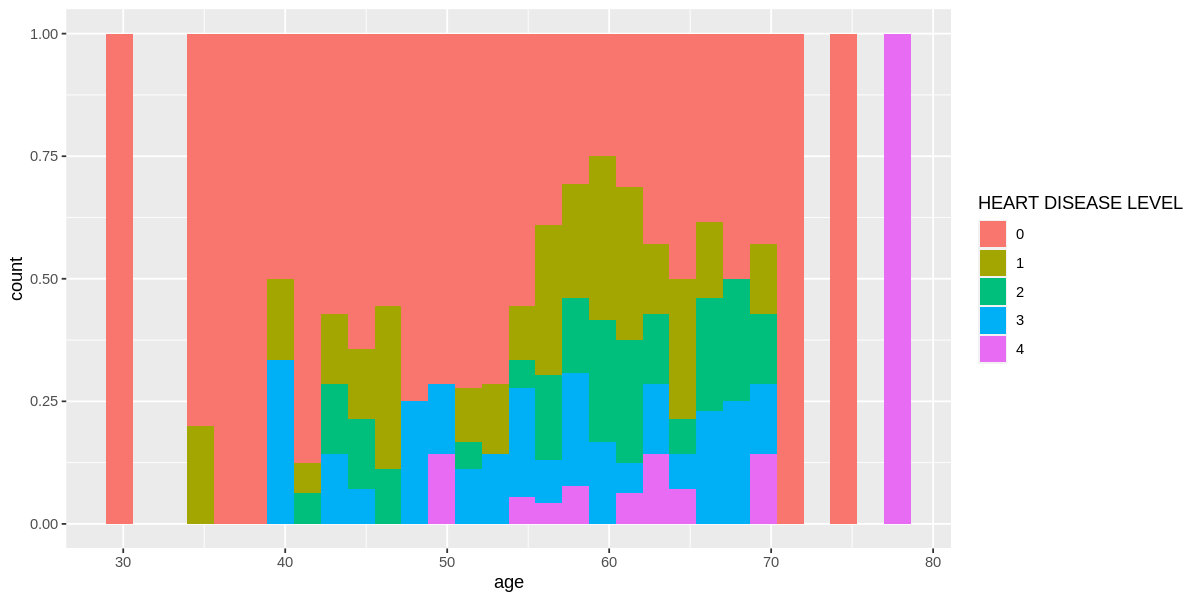

In [111]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=age,fill=num))+
    geom_histogram(position="fill")+
    labs(x="age",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 50 rows containing missing values (geom_bar).”


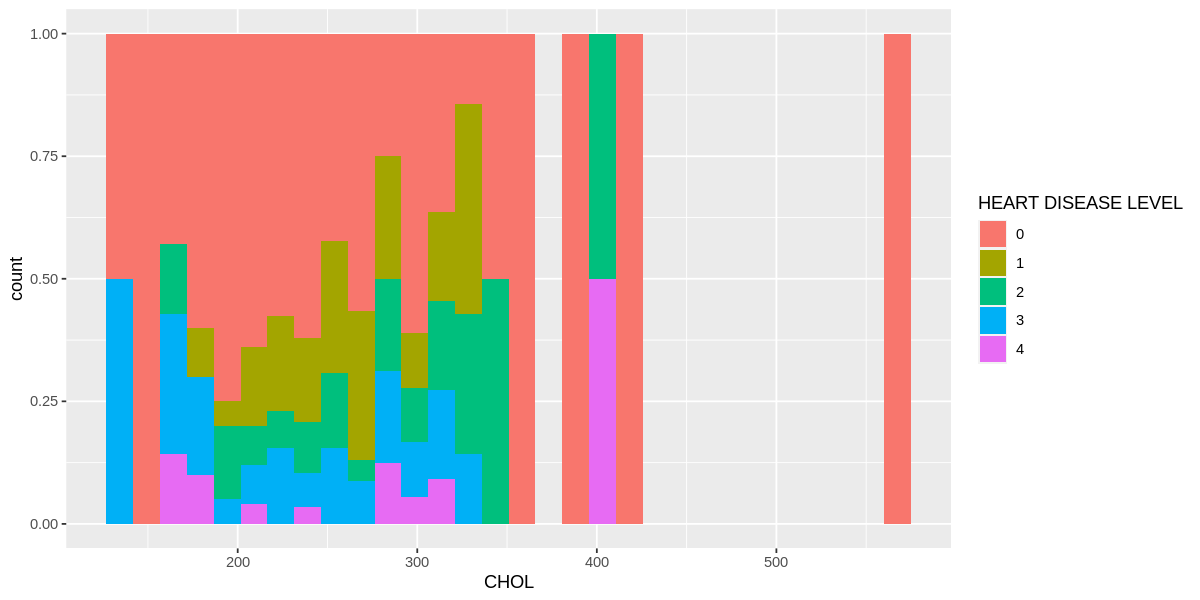

In [117]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=chol,fill=num))+
    geom_histogram(position="fill")+
    labs(x="CHOL",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 25 rows containing missing values (geom_bar).”


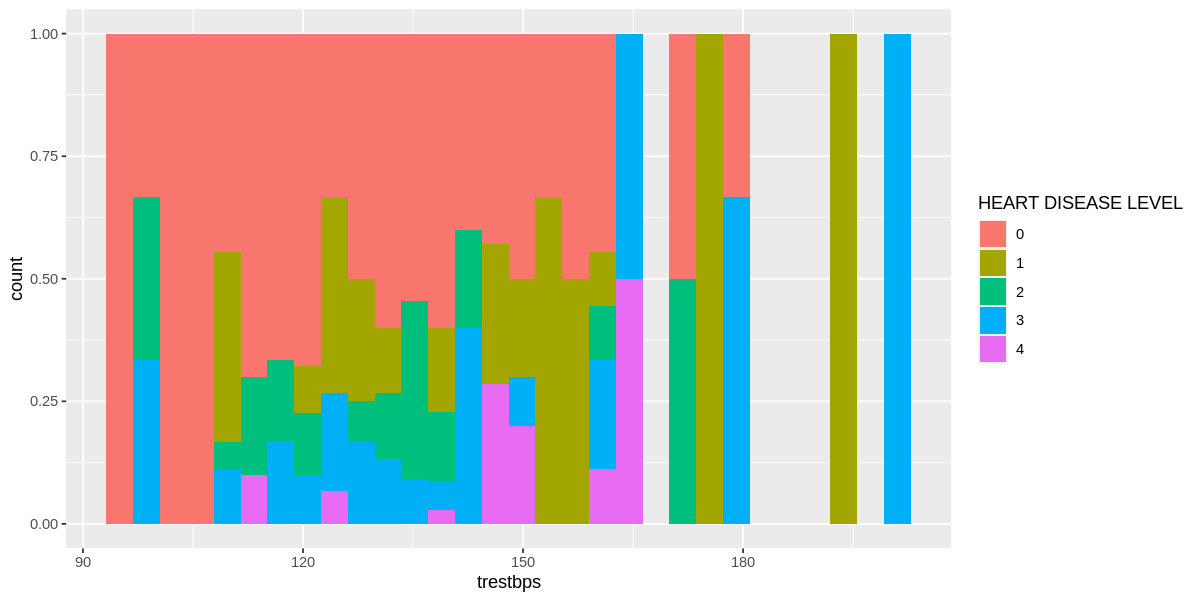

In [116]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=trestbps,fill=num))+
    geom_histogram(position="fill")+
    labs(x="trestbps",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 140 rows containing missing values (geom_bar).”


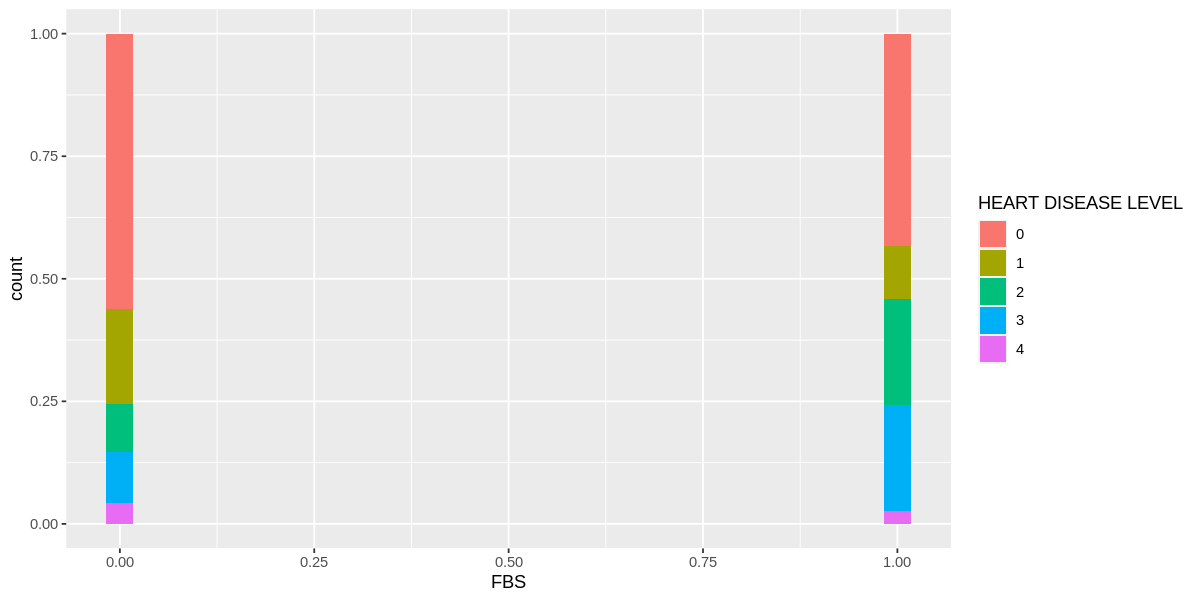

In [121]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=fbs,fill=num))+
    geom_histogram(position="fill")+
    labs(x="FBS",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 130 rows containing missing values (geom_bar).”


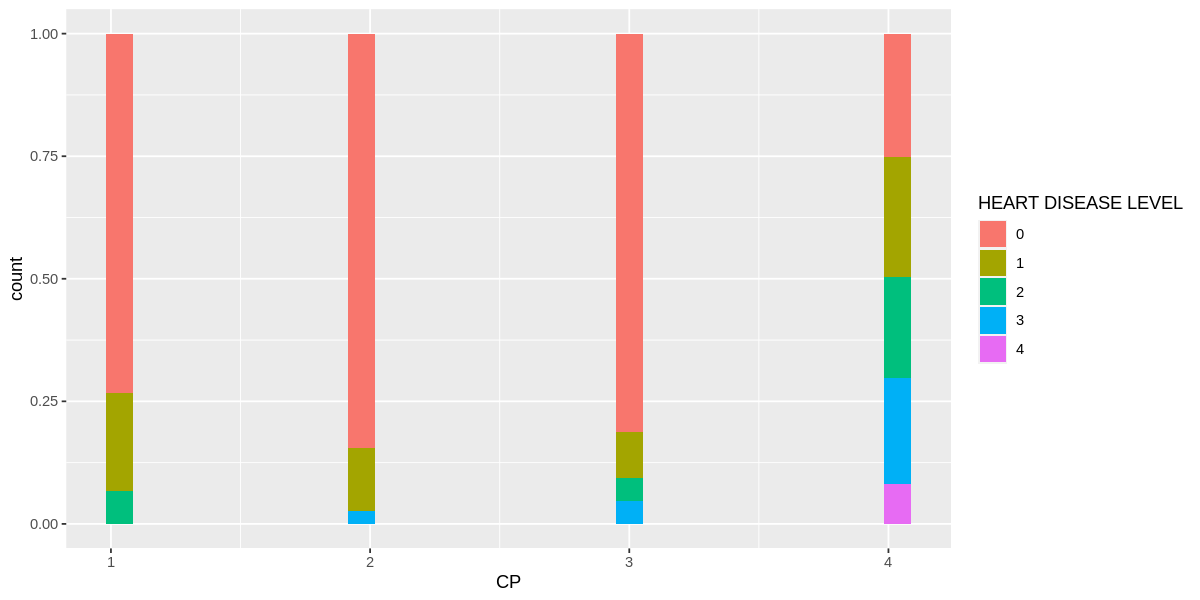

In [140]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=cp,fill=num))+
    geom_histogram(position="fill")+
    labs(x="CP",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



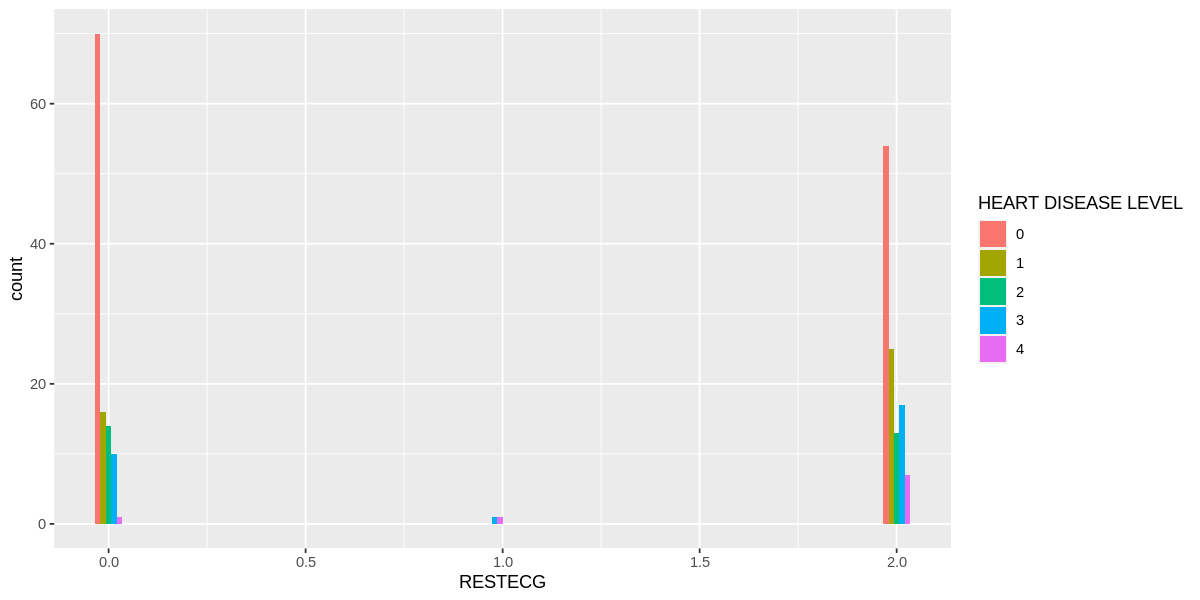

In [141]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=restecg,fill=num))+
    geom_histogram(position="dodge")+
    labs(x="RESTECG",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 140 rows containing missing values (geom_bar).”


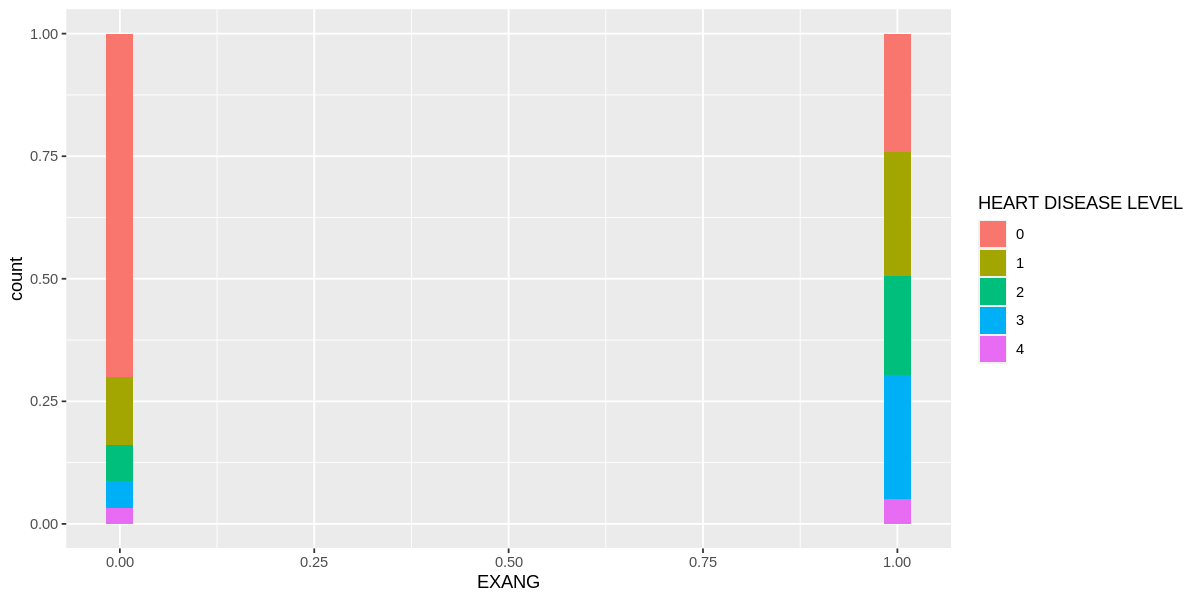

In [143]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=exang,fill=num))+
    geom_histogram(position="fill")+
    labs(x="EXANG",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



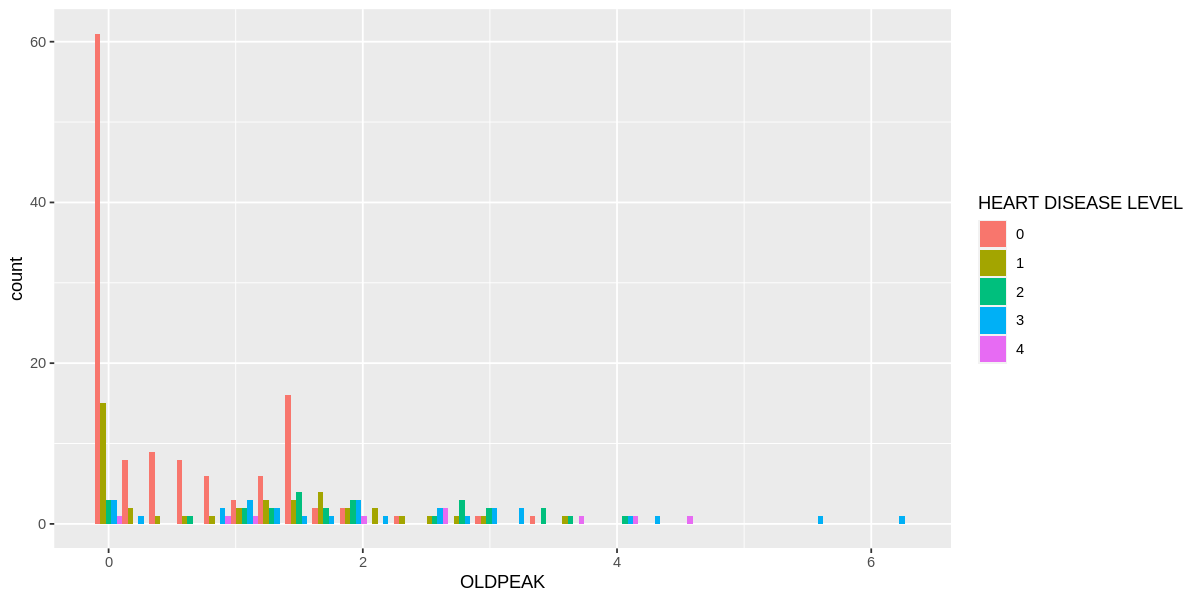

In [146]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=oldpeak,fill=num))+
    geom_histogram(position="dodge")+
    labs(x="OLDPEAK",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 130 rows containing missing values (geom_bar).”


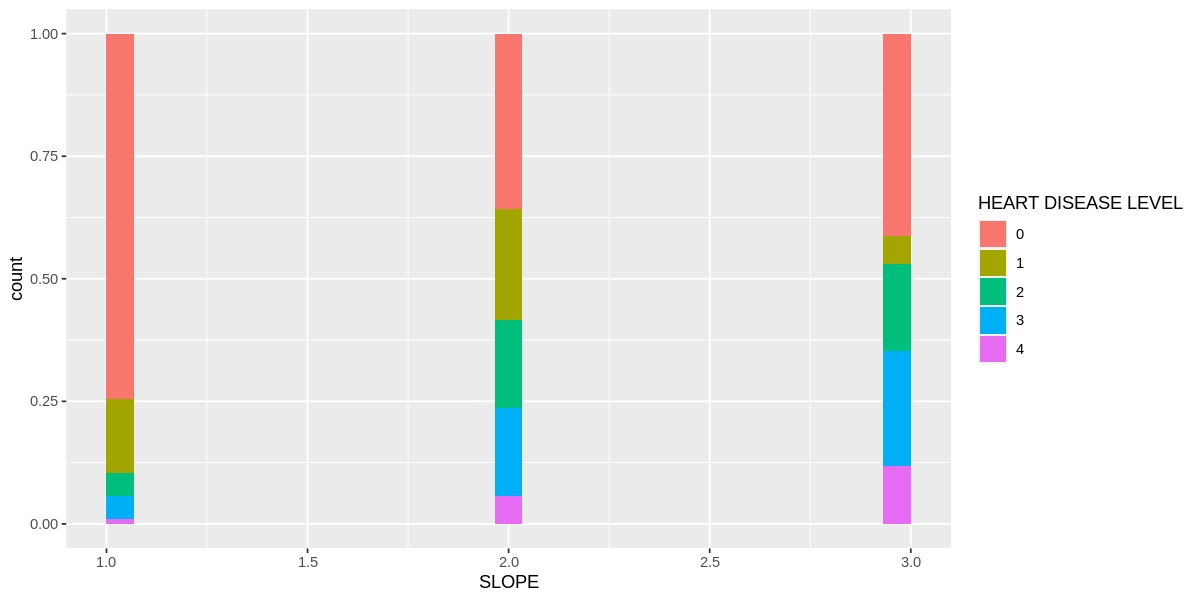

In [128]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=slope,fill=num))+
    geom_histogram(position="fill")+
    labs(x="SLOPE",fill="HEART DISEASE LEVEL")
a

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


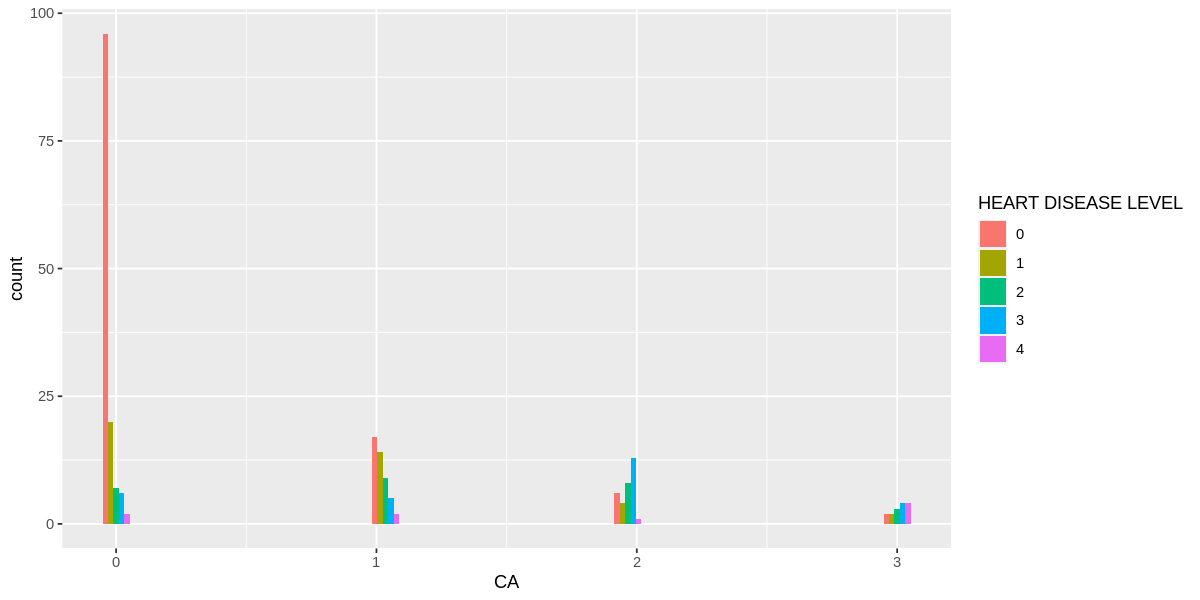

In [147]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=ca,fill=num))+
    geom_histogram(position="dodge")+
    labs(x="CA",fill="HEART DISEASE LEVEL")
a

In [126]:
summary <- heart_disease_train %>% 
   group_by(num) %>% 
   summarise(n = n())
summary

`summarise()` ungrouping output (override with `.groups` argument)



num,n
<fct>,<int>
0,124
1,41
2,27
3,28
4,9


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 135 rows containing missing values (geom_bar).”


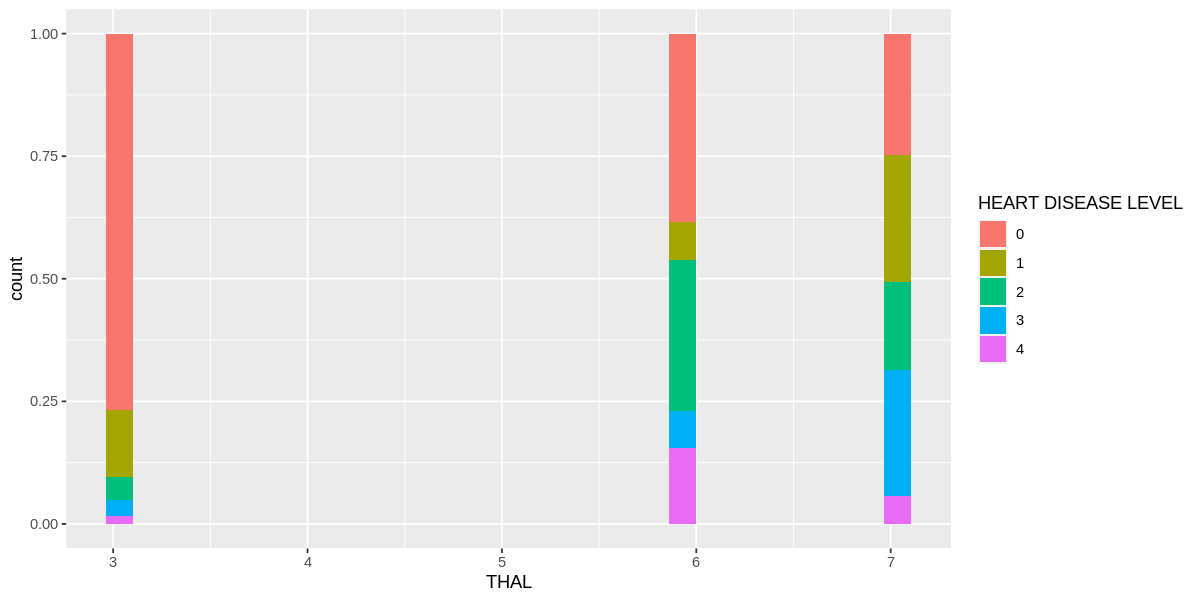

In [149]:
options(repr.plot.width = 10, repr.plot.height = 5)
a<-ggplot(heart_disease_train,aes(x=thal,fill=num))+
    geom_histogram(position="fill")+
    labs(x="THAL",fill="HEART DISEASE LEVEL")
a

Methods

Expected outcomes and significance